<a href="https://colab.research.google.com/github/sreeproject/AI-/blob/main/Copy_of_amazone_delivy__Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Amazon Delivery Time Prediction





##### **Project Type**    - EDA/Regression/Clustering
##### **Contribution**    - Individual/Team


# **Project Summary -**

This project focuses on building a robust machine learning system to accurately predict delivery times for e-commerce orders using diverse real-world factors. The model considers key variables such as product size, order distance, traffic conditions, weather, vehicle type, and shipping method to estimate delivery duration with high precision. The workflow begins with comprehensive data preprocessing — handling missing values, encoding categorical variables, and scaling numerical features to ensure model readiness. Exploratory data analysis is then performed to uncover relationships between various features and delivery time. Multiple regression models, including Linear Regression, Random Forest, and Gradient Boosting, are trained and evaluated using performance metrics such as MAE, RMSE, and R² to identify the best-performing model. The tuned Random Forest model, with an R² of approximately 0.90, demonstrates excellent predictive power. The system’s results and metrics are logged and compared using MLflow for transparency and model version tracking. Finally, the best model is deployed through a Streamlit-based interactive application, allowing users to input order parameters and receive real-time delivery time predictions. This end-to-end project showcases practical machine learning applications, model lifecycle management, and user-focused deployment for operational scalability in logistics and e-commerce optimization.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
amazon_df =pd.read_csv('amazon_delivery.csv')


### Dataset First View

In [ ]:
# Dataset First Look
amazon_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
amazon_df.shape

In [ ]:
amazon_df.columns

In [ ]:
amazon_df.dtypes

### Dataset Information

In [ ]:
# Dataset Info
amazon_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
amazon_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing values:",amazon_df.isnull().sum().sum())

In [ ]:
amazon_df.isnull().sum()

In [ ]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(amazon_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Amazon_df contains 43739 entries and  16 columns. No duplicate variables are there. 145 missing values are there. 9 object type variables and 7 integer type values are there and the variables are Order_ID, Agent_Age,Agent_Rating,Store_Latitude ,Store_Longitude ,Drop_Latitude	, Drop_Longitude , Order_Date ,Order_Time, Pickup_Time,Weather,Traffic,Vehicle	,Area,Delivery_Time	,Category.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
amazon_df.columns

In [ ]:
# Dataset Describe
amazon_df.describe()

### Variables Description

Order_ID: Unique identifier for each order.

Agent_Age: Age of the delivery agent.

Agent_Rating: Rating of the delivery agent.

Store_Latitude/Longitude: Geographic location of the store.

Drop_Latitude/Longitude: Geographic location of the delivery address.

Order_Date/Order_Time: Date and time when the order was placed.

Pickup_Time: Time when the delivery agent picked up the order.

Weather: Weather conditions during delivery.

Traffic: Traffic conditions during delivery.

Vehicle: Mode of transportation used for delivery.

Area: Type of delivery area (Urban/Metropolitan).

Delivery_Time: Target variable representing the actual time taken for delivery (in hours).

Category: Category of the product being delivered.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
amazon_df.nunique()

###Handlingmissing values

In [ ]:
amazon_df['Agent_Rating'].fillna(amazon_df['Agent_Rating'].median(), inplace=True)
amazon_df['Weather'].fillna(amazon_df['Weather'].mode()[0], inplace=True)


In [ ]:
amazon_df['Traffic'].value_counts()

Traffic contains "NaN" values. Change it with "Unknown" values

In [ ]:
# Replace string "NaN" (and other variants) with "Unknown"
amazon_df["Traffic"] = (
    amazon_df["Traffic"]
    .astype(str)
    .str.strip()
    .replace(["nan", "NaN", "NONE", "None", "NULL"], "Unknown")
    .fillna("Unknown")  # for actual np.nan values
)

print("Unique Traffic values after cleaning:", amazon_df["Traffic"].unique())

In [ ]:
amazon_df

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
amazon_df.head()

### What all manipulations have you done and insights you found?

Data wrangling means cleaning and preparing the data before using it for modeling. Missing values are filled, and errors or duplicates are removed. Text data like traffic or weather is changed into numbers. This helps the model learn better and give accurate delivery time predictions.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code\Delivery Time Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(amazon_df["Delivery_Time"], bins=30, kde=True, color="skyblue")
plt.title("Delivery Time Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

The graph shows the distribution of delivery times, with most deliveries occurring between 90 and 150 minutes. The peak delivery time is around 130 minutes, indicating this is the most common duration. The approximately normal shape suggests that while most deliveries are timely, a few take significantly longer. This pattern can help identify delays and improve overall delivery efficiency.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that most deliveries are completed between 90 and 150 minutes, with the highest frequency around 130 minutes. The distribution appears approximately normal, suggesting consistent delivery performance. A few deliveries take longer than average, indicating occasional delays. This insight can help identify typical delivery times and areas for potential improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the chart can help create a positive business impact by identifying the typical delivery time range and ensuring resources are optimized to meet that expectation consistently. Knowing that most deliveries occur around 130 minutes allows for better planning, customer communication, and performance benchmarking. However, the presence of longer delivery times—though infrequent—could signal operational inefficiencies or bottlenecks that may lead to customer dissatisfaction and negative growth if not addressed. Tackling these delays proactively can improve reliability and enhance customer trust.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
#Delivery Time by Traffic Condition
plt.figure(figsize=(8,5))
sns.boxplot(x="Traffic", y="Delivery_Time", data=amazon_df, palette="Set2")
plt.title("Delivery Time vs Traffic Condition")
plt.show()


##### 1. Why did you pick the specific chart?

Delivery times are shortest and most consistent under low traffic conditions, while jam and high traffic lead to significant delays and variability. Medium traffic performs moderately well, but unknown traffic shows erratic behavior with many outliers, suggesting data quality issues. This pattern highlights the importance of traffic-aware routing and data validation in optimizing delivery efficiency.

##### 2. What is/are the insight(s) found from the chart?

Deliveries are fastest and most consistent during low traffic conditions, while jam and high traffic significantly increase delivery time and variability. Medium traffic shows moderate performance, and unknown traffic introduces unpredictability due to data inconsistencies. These insights highlight the need for traffic-aware delivery planning and improved data classification.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can drive positive business impact by enabling smarter delivery scheduling and route optimization during low and medium traffic conditions, reducing delays and improving customer satisfaction. However, the presence of frequent delays under jam and high traffic, along with unpredictable delivery times in the "Unknown" category, could lead to negative growth if not addressed—resulting in increased operational costs, missed delivery windows, and reduced reliability. Improving traffic data accuracy and avoiding congested routes are essential to mitigate these risks and sustain performance.

#### Chart 3

In [ ]:
# Chart - 3   visualization code
#Vehicle Type vs Delivery Time
plt.figure(figsize=(7,5))
sns.barplot(x="Traffic", y="Delivery_Time", data=amazon_df, estimator=np.mean, ci=None, palette="pastel")
plt.title("Average Delivery Time by Traffic Type")
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart shows that delivery times are shortest during low traffic and longest during jam conditions, with high and medium traffic also causing significant delays. Unknown traffic has a moderate average delivery time, but may reflect inconsistent or incomplete data. These insights suggest that avoiding congested periods can improve delivery efficiency and reduce operational costs. Businesses can use this data to optimize routing and scheduling for better performance.

##### 2. What is/are the insight(s) found from the chart?

Deliveries are fastest during low traffic conditions, with an average time just above 100 units. Jam traffic causes the longest delays, nearing 150 units, followed by high and medium traffic, which also show elevated delivery times. Unknown traffic presents moderate delays, possibly due to inconsistent or incomplete data. Overall, traffic congestion has a clear negative impact on delivery speed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact by guiding delivery scheduling toward low-traffic periods, which significantly reduce delivery time and improve operational efficiency. This can enhance customer satisfaction and lower fuel and labor costs. However, consistently high delivery times during jam and high traffic conditions may lead to negative growth if not addressed, as they increase delays, reduce reliability, and strain resources. Additionally, the "Unknown" traffic category suggests data quality issues that could hinder accurate forecasting and decision-making.

#### Chart - 4

In [ ]:
# Chart - 3 visualization code
#Delivery Time by Weather Condition
plt.figure(figsize=(8,5))
sns.boxplot(x="Weather", y="Delivery_Time", data=amazon_df, palette="Set2")
plt.title("Delivery Time vs Weather Condition")
plt.show()

##### 1. Why did you pick the specific chart?

The box plot shows that delivery times are shortest and most consistent during sunny weather, making it ideal for logistics. Stormy and sandstorm conditions lead to the longest and most variable delivery times, indicating significant disruption. Cloudy, foggy, and windy weather also increase delivery time, but with less variability than storms. These insights highlight the importance of weather-aware planning to maintain delivery efficiency and reduce delays.

##### 2. What is/are the insight(s) found from the chart?

Deliveries are fastest and most consistent during sunny weather, with the lowest median and narrow variability. Stormy and sandstorm conditions cause the longest and most unpredictable delivery times, indicating major disruptions. Cloudy, foggy, and windy weather also increase delivery time, though with slightly less variability. Overall, adverse weather significantly impacts delivery efficiency, while clear conditions support optimal performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can lead to a positive business impact by enabling weather-aware delivery planning—scheduling more deliveries during sunny conditions can reduce delays and improve customer satisfaction. This helps optimize resource allocation and lowers operational costs. However, adverse weather like storms and sandstorms can cause significant delays and variability, leading to negative growth if not managed properly. These conditions increase uncertainty, strain logistics, and may result in missed delivery windows, making it crucial to build contingency plans and improve forecasting accuracy.

#### Chart - 5

In [ ]:
# Chart -  5 visualization code
#Vehicle Type vs Delivery Time
plt.figure(figsize=(7,5))
sns.barplot(x="Weather", y="Delivery_Time", data=amazon_df, estimator=np.mean, ci=None, palette="pastel")
plt.title("Average Delivery Time by Weather Type")
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart shows that deliveries are fastest during sunny weather, with an average time around 100 units. Cloudy and foggy conditions lead to the longest delivery times, averaging about 130 units, indicating significant delays. Stormy, windy, and sandstorm conditions also increase delivery time moderately, ranging between 120 and 125 units. These insights emphasize the importance of weather-aware logistics planning to maintain delivery speed and reliability.

##### 2. What is/are the insight(s) found from the chart?

Deliveries are fastest during sunny weather, with the lowest average delivery time around 100 units. Cloudy and foggy conditions lead to the longest delays, averaging about 130 units. Stormy, windy, and sandstorm conditions also increase delivery time moderately, ranging between 120 and 125 units. Overall, adverse weather significantly impacts delivery efficiency, while clear conditions support optimal performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can support positive business impact by enabling weather-based delivery planning—scheduling more deliveries during sunny conditions can reduce delays, improve customer satisfaction, and optimize resource usage. This helps streamline operations and lower costs. However, consistently high delivery times during cloudy and foggy weather may lead to negative growth if not addressed, as they increase inefficiencies and risk missed delivery windows. Ignoring these patterns could result in poor customer experience and higher operational strain, making it essential to factor weather into logistics strategy.

#### Chart - 6

In [ ]:
# Chart -  4 visualization code
#Delivery Time by Vehicle Condition
plt.figure(figsize=(8,5))
sns.boxplot(x="Vehicle", y="Delivery_Time", data=amazon_df, palette="Set2")
plt.title("Delivery Time vs vehicle ")
plt.show()


##### 1. Why did you pick the specific chart?

The box plot shows that scooters and bicycles have more consistent delivery times, with narrower spreads and fewer outliers. Motorcycles and vans display wider variability, suggesting less predictable performance and occasional delays. Vans also show notable outliers, indicating sporadic extreme delivery times. These insights suggest that smaller vehicles like scooters and bicycles may be more reliable for time-sensitive deliveries.

##### 2. What is/are the insight(s) found from the chart?

Scooters and bicycles show more consistent delivery times with narrower interquartile ranges, indicating reliable performance. Motorcycles and vans have wider delivery time distributions, suggesting greater variability and occasional delays. Vans also display notable outliers, pointing to sporadic extreme delivery times. Overall, smaller vehicles tend to offer more predictable delivery efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can support positive business impact by identifying scooters and bicycles as more reliable options for consistent delivery times, which helps improve scheduling accuracy and customer satisfaction. This can lead to better resource utilization and reduced operational delays. However, the wider variability and outliers seen in motorcycle and van deliveries may contribute to negative growth if not managed, as they introduce unpredictability and risk of late deliveries. Addressing these inconsistencies through route planning or vehicle reassignment can help mitigate potential inefficiencies.

#### Chart - 7

In [ ]:
# Chart -  6 visualization code
#Vehicle Type vs Delivery Time
plt.figure(figsize=(7,5))
sns.barplot(x="Vehicle", y="Delivery_Time", data=amazon_df, estimator=np.mean, ci=None, palette="pastel")
plt.title("Average Delivery Time by Vehicle Type")
plt.show()

##### 1. Why did you pick the specific chart?

Motorcycles have the highest average delivery time, making them the least efficient among the vehicle types. Scooters and vans perform similarly, with slightly lower delivery times, indicating moderate efficiency. Bicycles offer better delivery speed than motorcycles but are slightly slower than scooters and vans.

##### 2. What is/are the insight(s) found from the chart?

Motorcycles have the highest average delivery time, indicating they are the least time-efficient among the vehicle types. Scooters and vans show similar and slightly lower delivery times, suggesting moderate efficiency. Bicycles perform better than motorcycles but are slightly slower than scooters and vans. Overall, scooters and vans appear to be the most effective choices for minimizing delivery time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact by identifying scooters and vans as relatively efficient delivery options, allowing for better fleet planning and reduced delivery times. This can improve customer satisfaction and optimize operational costs. However, motorcycles show the highest average delivery time, which may lead to negative growth if overused, as they contribute to slower deliveries and potential delays. Addressing this inefficiency by reassigning vehicle types or improving routing strategies can mitigate the risk and enhance overall performance.

#### Chart - 8

In [ ]:
# Chart -  8 visualization code
#Delivery Time by Area Condition
plt.figure(figsize=(8,5))
sns.boxplot(x="Area", y="Delivery_Time", data=amazon_df, palette="muted")
plt.title("Delivery Time vs Area Type")
plt.show()


##### 1. Why did you pick the specific chart?

Semi-Urban areas have the highest median delivery time, indicating slower and more consistent delays. Urban show wide variability with several outliers, suggesting unpredictable delivery performance.Metropolitian areas has no outliers . Other areas have the lowest median and moderate spread, making them the most efficient for deliveries.

##### 2. What is/are the insight(s) found from the chart?

The Metropolitan area in the box plot shows a wide spread of delivery times but does not contain any outliers, unlike Urban and Semi-Urban areas. This suggests that while delivery times in Metropolitan zones vary, they remain within a consistent range without extreme delays. It's a valuable distinction for logistics planning, as it points to relatively stable performance despite variability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact by highlighting that “Other” areas offer the most efficient delivery times, making them ideal for prioritizing high-volume or time-sensitive deliveries. This enables better route planning, resource allocation, and customer satisfaction. However, Semi-Urban areas show the highest median delivery time, which may lead to negative growth if not addressed, as they consistently slow down operations and increase delivery costs. Without targeted interventions—like route optimization or infrastructure improvements—these delays could reduce overall efficiency and hurt service reliability.

####Chart - 9

In [ ]:
# Chart -  8 visualization code
#Vehicle Type vs Delivery Time
plt.figure(figsize=(7,5))
sns.barplot(x="Area", y="Delivery_Time", data=amazon_df, estimator=np.mean, ci=None, palette="pastel")
plt.title("Average Delivery Time by Area Type")
plt.show()

##### 1. Why did you pick the specific chart?

Semi-Urban areas have the highest average delivery time (~230 units), indicating significant delays and lower efficiency. Metropolitan areas follow with moderately high delivery times (~140 units), suggesting room for improvement. Urban and Other areas show much faster delivery times (~100 and ~90 units), making them more suitable for time-sensitive operations. These insights can guide strategic resource allocation and route planning to improve overall delivery performance.

##### 2. What is/are the insight(s) found from the chart?

Semi-Urban areas have the highest average delivery time (~230 units), indicating they are the least efficient for deliveries. Metropolitan areas follow with moderately high delivery times (~140 units), suggesting potential delays. Urban and Other areas show significantly lower average delivery times (~100 and ~90 units), making them more suitable for faster and reliable deliveries. These insights highlight clear performance differences across area types, useful for optimizing delivery strategies.

#### Chart - 10

In [ ]:
#Delivery Time by Category Condition
plt.figure(figsize=(12, 6))
sns.barplot(x="Category", y="Delivery_Time", data=amazon_df, estimator=np.mean, palette="muted")
plt.title("Average Delivery Time by Category Type")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

##### 1. Why did you pick the specific chart?

Grocery has the lowest average delivery time (~20 units), making it the most efficiently delivered category. All other categories—including Clothing, Electronics, and Home—have delivery times clustered around ~130 units, indicating slower fulfillment. This contrast highlights Grocery as a clear outlier in operational speed. The chart suggests that non-grocery categories may benefit from targeted process improvements to reduce delivery delays.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that Grocery has a significantly lower average delivery time (~20 units), making it the most efficiently delivered category. All other categories—including Clothing, Electronics, Toys, and Home—have delivery times clustered around ~130 units, indicating slower and more uniform delivery speeds. This contrast positions Grocery as a clear outlier in operational performance. The insight suggests that delivery processes for non-grocery items may require optimization to match the efficiency seen in Grocery.

#### Chart - 11

In [ ]:
# Chart - 10 visualization code

#Delivery Time by Area Condition
plt.figure(figsize=(7,5))
sns.boxplot(x="Category", y="Delivery_Time", data=amazon_df, palette="muted")
plt.title("Delivery Time vs category  Type")
plt.show()

##### 1. Why did you pick the specific chart?

he box plot shows that the Books category has the lowest median delivery time and the narrowest range, indicating fast and consistent delivery. Most other categories—including Clothing, Electronics, and Cosmetics—have similar median delivery times with wider spreads, suggesting slower and more variable performance. Categories like Skincare and Pets also follow this slower trend without significant deviation. Overall, Books stand out as the most efficient category, while others may need process improvements to enhance delivery speed and consistency.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the Books category has the lowest median delivery time and the narrowest range, indicating fast and consistent delivery performance. Most other categories—including Clothing, Electronics, Cosmetics, and Snacks—have similar median delivery times with wider spreads, suggesting slower and more variable delivery. This positions Books as a standout category in terms of operational efficiency. The insight highlights an opportunity to analyze and replicate the logistics strategies used for Books across other slower categories.

#### Chart - 12

In [ ]:
#Create new feature -- Calculate distance and create the 'distance_km' column
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    km = 6371 * c  # Radius of Earth in kilometers. Use 3956 for miles
    return km

# Calculate distance and create the 'distance_km' column
amazon_df['distance_km'] = amazon_df.apply(lambda row: haversine(row['Store_Latitude'], row['Store_Longitude'], row['Drop_Latitude'], row['Drop_Longitude']), axis=1)

In [ ]:
# Chart - 12 visualization code
#Relationship between Distance and Delivery Time
plt.figure(figsize=(8,6))
sns.scatterplot(x="distance_km", y="Delivery_Time", hue="Traffic", data=amazon_df, alpha=0.7, palette="Set1")
plt.title("Distance vs Delivery Time (colored by Traffic)")
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot shows that delivery time generally increases with distance, but the relationship is not strictly linear. Traffic conditions significantly impact delivery time—points labeled with "Jam" or "High" traffic tend to have longer delays. Most deliveries occur within 0–10,000 km, with a separate cluster between 15,000–20,000 km likely representing long-haul shipments. The chart highlights how both distance and traffic jointly influence delivery performance, offering valuable insights for optimizing logistics.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that delivery time generally increases with distance, but the relationship is influenced heavily by traffic conditions. Deliveries affected by “Jam” or “High” traffic tend to have longer delivery times, regardless of distance. Most deliveries occur within the 0–10,000 km range, with a separate cluster between 15,000–20,000 km likely representing long-haul shipments. The insight highlights that both distance and traffic level are key drivers of delivery performance, and optimizing routes based on traffic data could significantly reduce delays.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
#Agent Performance Across Conditions

plt.figure(figsize=(8,5))
sns.scatterplot(x="Agent_Rating", y="Delivery_Time", hue="Weather", data=amazon_df, alpha=0.6)
plt.title("Agent Rating vs Delivery Time (by Weather)")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Traffic", y="Delivery_Time", hue="Area", data=amazon_df, ci=None, palette="muted")
plt.title("Agent Performance across Traffic and Area")
plt.show()

##### 1. Why did you pick the specific chart?

1,Most deliveries occur with agent ratings between 4 and 5, showing a wide range of delivery times. Weather conditions like Stormy, Fog, and Windy are linked to longer delivery durations, even when agent ratings are high. Sunny weather dominates across all rating levels and is often associated with faster deliveries. The chart highlights that both agent performance and weather conditions significantly influence delivery time.

2,Semi-Urban areas consistently show the highest delivery times across all traffic conditions, especially under High and Jam traffic. Urban and Metropolitan areas have moderate delivery times, while Other areas perform best with the lowest delivery durations. Low traffic conditions result in the fastest deliveries across all area types. The chart highlights that both traffic level and area type significantly impact agent performance, with Semi-Urban zones needing targeted improvements.

#### Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(8,6))
sns.heatmap(amazon_df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap shows a perfect positive correlation (1.00) between Delivery_Time and distance_km, confirming that longer distances lead to longer delivery durations. Store_Latitude and Drop_Latitude also have a strong positive correlation (0.93), indicating geographic alignment between pickup and drop locations. Agent_Age has a moderate positive correlation (0.25) with Delivery_Time, suggesting older agents may take slightly longer. Agent_Rating shows a weak negative correlation (-0.05) with Delivery_Time, implying higher-rated agents tend to deliver faster.

##### 2. What is/are the insight(s) found from the chart?

Observations from Heatmap:

Agent_Age (0.25) → Positive correlation → keep.

Agent_Rating (-0.29) → Negative correlation → keep.

Store_Latitude / Store_Longitude / Drop_Latitude / Drop_Longitude → Very high multicollinearity (0.9+). Not good to keep all → instead use calculated distance_km.

Remove all four (Store_Latitude, Store_Longitude, Drop_Latitude, Drop_Longitude) because:

They are highly correlated with each other (multicollinearity problem).

Already derived distance_km, which captures the useful information from these coordinates.

In [ ]:
# Drop raw latitude and longitude columns
cols_to_drop = ["Store_Latitude", "Store_Longitude", "Drop_Latitude", "Drop_Longitude"]

amazon_df1 = amazon_df.drop(columns=cols_to_drop, errors="ignore")

print("Remaining columns after dropping coordinates:")
print(amazon_df1.columns)

In [ ]:
amazon_df1.shape

In [ ]:
amazon_df1.head()

#### Pair Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select important numerical columns (you can add distance_km later)
num_cols = ["Agent_Age", "Agent_Rating", "Delivery_Time"]

# Pair plot with Traffic as hue (to see clustering by traffic condition)
sns.pairplot(amazon_df1[num_cols + ["Traffic"]], hue="Traffic", diag_kind="kde", palette="Set2")

plt.suptitle("Pair Plot of Numerical Features vs Delivery Time", y=1.02)
plt.show()

The pair plot shows that delivery times vary widely across traffic conditions, with Jam and High traffic linked to longer delays. Most deliveries are concentrated around agent ratings of 3–5 and ages between 30–45, but these features show no strong correlation with delivery time. The distribution of delivery time is highest under Jam traffic, followed by High and Medium, while Unknown traffic shows fewer but more extreme outliers. Overall, traffic condition appears to be a more influential factor in delivery performance than agent age or rating.

In [ ]:
#pair plot
sns.pairplot(amazon_df1, hue="Delivery_Time")
plt.show()



##### 1. Why did you pick the specific chart?

The pair plot shows that Delivery_Time increases with distance_km, as indicated by darker purple points at higher distances. Agent_Age and Agent_Rating do not show strong correlations with delivery time, as data points are widely scattered across all values. Most deliveries occur within 10,000 km, and agents are typically aged between 25–45 with ratings between 3 and 5. Overall, distance is the most influential factor affecting delivery time, while agent characteristics have minimal impact.

In [ ]:
amazon_df1

Categorical Ecoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Make a safe copy
amazon_df_clean = amazon_df1.copy()

# Ordinal Encode Traffic

traffic_order = [["Low", "Medium", "High", "Jam", "Unknown"]]
ord_enc = OrdinalEncoder(categories=traffic_order,
                         handle_unknown="use_encoded_value",
                         unknown_value=len(traffic_order[0]))

amazon_df_clean["Traffic_encoded"] = ord_enc.fit_transform(amazon_df_clean[["Traffic"]])

# One-Hot Encode Others

onehot_cols = ["Weather", "Vehicle", "Area", "Category"]

amazon_df_clean = pd.get_dummies(
    amazon_df_clean,
    columns=onehot_cols,
    drop_first=True  # avoids dummy variable trap
)

# Result

print("Shape after encoding:", amazon_df_clean.shape)
print(amazon_df_clean.head())

In [ ]:
amazon_df_clean.columns

In [ ]:
amazon_df_clean.dtypes

After one hot encoding values are in bool(false/true) type. So change it to integer type

In [ ]:
# Convert boolean columns to integers ---
bool_cols = amazon_df_clean.select_dtypes(include="bool").columns
amazon_df_clean[bool_cols] = amazon_df_clean[bool_cols].astype(int)

Traaffic_encoded is there so remove traffic field

In [ ]:
amazon_df_clean= amazon_df_clean.drop(columns="Traffic",axis=1)
amazon_df_clean.head()

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#already did

#### What all missing value imputation techniques have you used and why did you use those techniques?

For skewed numerical features like agent_rating, I used median imputation to reduce the impact of outliers.

For categorical variables like weather conditions, I used mode imputation (most frequent value) since it’s the most suitable for non-numeric data.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#already did.
# use Ordinal encoding for "Trafic" and One-Hot encoding for "Weather", "Vehicle", "Area", "Category"

#### What all categorical encoding techniques have you used & why did you use those techniques?

Ordinal Encoding and One-Hot Encoding are two methods used to convert categorical data (text labels) into numerical form so that machine learning models can understand them.

Ordinal Encoding:

Used when categories have a natural order or ranking.

Each category is assigned a number based on its order.

Example:

Traffic = ['Low', 'Medium', 'High']
→ Ordinal Encoding: Low=1, Medium=2, High=3

One-Hot Encoding:

Used when categories have no order (they’re just different types).

It creates a new column for each category, marking presence with 1 and absence with 0.

Example:

Weather = ['Sunny', 'Rainy', 'Foggy']
→ One-Hot Encoding:
   Sunny  Rainy  Foggy
    1      0      0
 Use Ordinal Encoding for ordered data  and One-Hot Encoding for unordered data .   

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Code to Calculate Distance --> 'distance_km'

In [ ]:
import pandas as pd

# Convert order timestamp column to datetime (adjust column name if different)
# Create a combined datetime column
amazon_df_clean["Order_DateTime"] = amazon_df_clean["Order_Date"] + ' ' + amazon_df_clean["Order_Time"]

# Convert the combined column to datetime, coercing errors to NaT
amazon_df_clean["Order_DateTime"] = pd.to_datetime(amazon_df_clean["Order_DateTime"], errors='coerce')

# *** Diagnostic Print Statement ***
print("Missing values in original 'Order_Date':", amazon_df_clean["Order_Date"].isnull().sum())
print("Missing values in original 'Order_Time':", amazon_df_clean["Order_Time"].isnull().sum())
print("NaT values in 'Order_DateTime' after coercion:", amazon_df_clean["Order_DateTime"].isnull().sum())
# *** End of Diagnostic Print Statement ***


# Extract features
amazon_df_clean["Order_Hour"] = amazon_df_clean["Order_DateTime"].dt.hour
amazon_df_clean["Order_DayOfWeek"] = amazon_df_clean["Order_DateTime"].dt.dayofweek   # 0=Monday, 6=Sunday
amazon_df_clean["Order_DayName"] = amazon_df_clean["Order_DateTime"].dt.day_name()
amazon_df_clean["Order_Month"] = amazon_df_clean["Order_DateTime"].dt.month

# (Optional) Weekend flag
amazon_df_clean["Is_Weekend"] = amazon_df_clean["Order_DayOfWeek"].isin([5, 6]).astype(int)

# Drop original date and time columns if not needed
amazon_df_clean = amazon_df_clean.drop(["Order_Date", "Order_Time"], axis=1)

# Verify
print(amazon_df_clean[["Order_DateTime", "Order_Hour", "Order_DayOfWeek", "Order_DayName","Order_Month", "Is_Weekend"]].head())

### Create these 6 new features "Order_DateTime", "Order_Hour", "Order_DayOfWeek", "Order_DayName", "Order_Month","Is_Weekend"

In [ ]:
amazon_df_clean.head()

In [ ]:
print(amazon_df_clean.columns)
print(amazon_df_clean.shape)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Drop 4 columns Remove all four (Store_Latitude, Store_Longitude, Drop_Latitude, Drop_Longitude) because:They
# are highly correlated with each other (multicollinearity problem) and dirived distance_km from them
#Create these 6 new features "Order_DateTime", "Order_Hour", "Order_DayOfWeek", "Order_DayName",
#"Order_Month","Is_Weekend" and drop Order_Date, Order_Time and Traffic.


##### What all feature selection methods have you used  and why?

correlation analysis, feature importance from tree-based models, and domain knowledge for feature selection.

Correlation analysis was used to identify and remove highly correlated numerical features to avoid multicollinearity.

Feature importance from models like Random Forest and Gradient Boosting helped to rank and select the most impactful variables influencing delivery time.

Domain knowledge was applied to retain meaningful features such as distance, traffic, weather, and order time, which are logically relevant to delivery duration

##### Which all features you found important and why?

The most important features identified were distance, traffic conditions, agent rating, weather, and order time.

Distance directly affects how long it takes to deliver an order — longer distances naturally increase delivery time.

Traffic conditions play a major role, as heavier traffic leads to slower deliveries.

Agent rating reflects delivery efficiency — higher-rated agents usually deliver faster.

Weather conditions like rain or storms can delay delivery times.

Order time (hour, day, or weekend) impacts traffic and delivery patterns — for example, peak hours or weekends often lead to longer deliveries.

### 6. Data Scaling

In [ ]:
 #--- 4. Select Numeric Features for Scaling ---
numeric_features = amazon_df_clean.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
amazon_df_clean[numeric_features] = scaler.fit_transform(amazon_df_clean[numeric_features])

##### Which method have you used to scale you data and why?

used StandardScaler to scale the numerical features in the dataset.

StandardScaler transforms data so that each feature has a mean of 0 and a standard deviation of 1, which ensures all numerical features are on the same scale.This is important because features like distance and agent rating have different ranges, and unscaled data could bias the model towards features with larger values.

In [ ]:
amazon_df_clean.head()

### 8. Data Splitting

In [ ]:
X = amazon_df_clean.drop(["Delivery_Time","Order_ID"], axis=1)  # Features
y = amazon_df_clean["Delivery_Time"]                 # Target

In [ ]:
X.shape,y.shape

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


##### What data splitting ratio have you used and why?

Here use 80:20 train-test split, where 80% of the data was used for training the model and 20% for testing its performance.The test set ensures that we can evaluate the model on unseen data, giving a realistic estimate of its performance.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Linear Regression

lin_reg = LinearRegression()

# Drop non-numeric columns from X_train and X_test
X_train_numeric = X_train.drop(columns=[ 'Pickup_Time', 'Order_DayName', 'Order_DateTime'])
X_test_numeric = X_test.drop(columns=[ 'Pickup_Time', 'Order_DayName', 'Order_DateTime'])

# Impute missing values in the numeric features
imputer = SimpleImputer(strategy='mean')
X_train_numeric = imputer.fit_transform(X_train_numeric)
X_test_numeric = imputer.transform(X_test_numeric)


lin_reg.fit(X_train_numeric, y_train)

# ==========================
# 3. Evaluate Model
# ==========================
y_pred = lin_reg.predict(X_test_numeric)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# ==========================
# 4. Display Results
# ==========================
print("✅ Linear Regression Results:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

### ML Model - 2 & 3

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
# ==========================
# 2. Initialize Models
# ==========================
models = {
    #"Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

# ==========================
# 3. Train & Evaluate
# ==========================
results = {}

# Drop non-numeric columns from X_train and X_test
X_train_numeric = X_train.drop(columns=[ 'Pickup_Time', 'Order_DayName', 'Order_DateTime'])
X_test_numeric = X_test.drop(columns=[ 'Pickup_Time', 'Order_DayName', 'Order_DateTime'])

# Impute missing values in the numeric features
imputer = SimpleImputer(strategy='mean')
X_train_numeric = imputer.fit_transform(X_train_numeric)
X_test_numeric = imputer.transform(X_test_numeric)


for name, model in models.items():
    model.fit(X_train_numeric, y_train)
    y_pred = model.predict(X_test_numeric)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# ==========================
# 4. Show Results
# ==========================
results_df = pd.DataFrame(results).T
print(results_df)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame from your metrics
data = {
    "Model": ["Random Forest", "Gradient Boosting"],
    "MAE": [0.334657, 0.362063],
    "RMSE": [0.436625, 0.458460],
    "R2": [0.807125, 0.787351]
}

df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(8,5))
bar_width = 0.25
positions = range(len(df))

# Create bars for each metric
plt.bar([p - bar_width for p in positions], df["MAE"], width=bar_width, label="MAE")
plt.bar(positions, df["RMSE"], width=bar_width, label="RMSE")
plt.bar([p + bar_width for p in positions], df["R2"], width=bar_width, label="R²")

# Add labels and formatting
plt.xticks(positions, df["Model"])
plt.ylabel("Score")
plt.title("Model Evaluation Metrics Comparison")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd

# --- Prepare data for the pipeline ---
# Drop non-numeric columns from the full dataset X before creating the pipeline
X_numeric = X.drop(columns=['Pickup_Time', 'Order_DayName', 'Order_DateTime'], errors='ignore')

# Split the data again after dropping columns
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

#Build Pipeline
preprocessor = SimpleImputer(strategy = 'mean' )
rf_model = RandomForestRegressor(random_state=42)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf_model)
])

# ---------------------------
#  Hyperparameter Grid for RandomizedSearchCV
# ---------------------------
param_distributions = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__max_depth": [None, 10, 20, 30, 50],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", 0.5, 1.0], # 'auto' is deprecated in favour of 'sqrt'
    "model__bootstrap": [True, False]
}

# ---------------------------
#  Setup RandomizedSearchCV
# ---------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,              # number of parameter settings to try
    cv=cv,
    verbose=2,
    n_jobs=-1,              # use all cores
    scoring="neg_mean_absolute_error",  # MAE as scoring
    random_state=42
)

# ---------------------------
# Train & Find Best Hyperparameters
# ---------------------------
# Use the prepared numeric data for fitting
random_search.fit(X_numeric, y)

print("✅ Best Hyperparameters:")
print(random_search.best_params_)

# ---------------------------
# Evaluate Best Model on the test set
# ---------------------------
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test) # Predict on the test set

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Test Data:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

Analysis

High Accuracy

R² ≈ 0.90 → the model explains ~90% of the variance in delivery times.

Very strong performance for real-time prediction tasks.

Low Error

MAE 0.24 → on average, predictions are off by ~0.24 units (minutes, I assume).

RMSE 0.315 → very small overall error, shows predictions are tightly clustered around actual values.

##### Which hyperparameter optimization technique have you used and why?

Here used RandomizedSearchCV for hyperparameter optimization.

RandomizedSearchCV searches over a predefined set of hyperparameter values randomly for a fixed number of iterations, instead of trying all possible combinations like GridSearchCV.

To tune parameters of the Random Forest model, such as n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features, resulting in improved predictive accuracy.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, significant improvement was observed after hyperparameter tuning using RandomizedSearchCV on the Random Forest model.

Model	             MAE	 RMSE	        R²

Linear Regression	0.510	  0.650	     0.576

Random Forest   	0.335	  0.437	     0.807

Gradient Boosting	0.362	  0.458	     0.787

Random Forest (Tuned)	0.242	0.315	   0.900

Observations:

MAE decreased from 0.335 to 0.242, indicating smaller average prediction errors.

RMSE decreased from 0.437 to 0.315, showing reduced variance in prediction errors.

R² improved from 0.807 to 0.900, meaning the tuned model explains more variance in delivery times.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assume X_train, y_train are already prepared
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp_df)

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

his bar chart shows the feature importance from your Random Forest model predicting delivery times. Feature importance indicates how much each feature contributes to the model’s predictions.

Key observations from the chart:

Category_Grocery is the most important feature, suggesting orders in the grocery category have the largest impact on delivery time.

Agent_Rating and distance_km are also highly important:

Agent_Rating: Higher-rated agents deliver faster.

distance_km: Longer distances naturally increase delivery time.

Traffic_encoded and Agent_Age follow, showing traffic conditions and agent experience also affect delivery times.

Weather features like Sunny, Fog, Stormy, and Windy have moderate importance, indicating weather conditions influence deliveries.

Features like Vehicle type, Order hour/day/month, Area, and most Category types have lower importance, meaning they influence predictions less.

Features like Is_Weekend, Area_Other, and some Vehicle/Category features have almost zero importance, so the model rarely uses them to make predictions.

In [ ]:
X_numeric.to_csv("model_input_sample.csv", index=False)


In [ ]:
import joblib

# Save pipeline
joblib.dump(best_model, "random_forest_pipeline.pkl")
joblib.dump(list(X_train.columns), "model_features.pkl")
# Load pipeline later
loaded_pipeline = joblib.load("random_forest_pipeline.pkl")

# To predict on new data, replace 'new_data' with your actual new data
# y_new_pred = loaded_pipeline.predict(new_data)

In [ ]:
import matplotlib.pyplot as plt
import tempfile, os

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"{rf_model} - Predicted vs Actual")
tmp_path = os.path.join(tempfile.gettempdir(), f"{rf_model}_scatter.png")
plt.savefig(tmp_path)
mlflow.log_artifact(tmp_path)

This scatter plot compares predicted vs. actual values from a RandomForestRegressor model with 300 estimators and a fixed random state of 42:

 The points are tightly clustered along the diagonal from bottom-left to top-right, showing a strong positive correlation—meaning the model’s predictions closely match the actual values.

 Predictions are slightly more dispersed at the lower end (actual values below -1.5), but become more accurate as values increase.

 The dense alignment near the diagonal suggests the model is well-calibrated and performs reliably across most of the target range.

This visualization confirms that the RandomForestRegressor is effective for this task, with minimal bias and good generalization.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import numpy as np

# Tuned Random Forest metrics
metrics = {
    "MAE": 0.2419,
    "RMSE": 0.3150,
    "R²": 0.8996
}

# Separate values
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Create figure
plt.figure(figsize=(8,5))
bars = plt.bar(metric_names, metric_values, color=["#66c2a5", "#fc8d62", "#8da0cb"])

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}",
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("📈 Model Performance Metrics — Tuned Random Forest", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 1.1)
plt.show()



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The main metrics  used were:

Mean Absolute Error (MAE): MAE provides a straightforward measure of the average prediction error in the same units as the target variable. It helps business teams understand expected deviations from actual outcomes, enabling better resource planning and operational efficiency.

Root Mean Squared Error (RMSE): RMSE penalizes larger errors more heavily than MAE, which is critical in scenarios where significant deviations can lead to high costs or risks, such as inventory mismanagement or delayed deliveries.

R-squared (R²): R² indicates how much variance in the target variable the model explains. A higher R² demonstrates that the model captures key patterns in the data, giving confidence that decisions based on the model will align with actual outcomes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The tuned Random Forest was chosen as the final prediction model. This decision was based on both statistical performance and business relevance:

Significant improvement after hyperparameter tuning: Using RandomizedSearchCV, the MAE reduced from 0.335 to 0.242, meaning the average prediction error decreased substantially.

Reduced variance in errors: RMSE dropped from 0.437 to 0.315, indicating the model’s predictions are more consistent and reliable.

Higher explanatory power: R² improved from 0.807 to 0.900, demonstrating that the tuned model captures more variance in delivery times, making it highly predictive.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model used is a Tuned Random Forest Regressor, an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting. Random Forest works well for complex datasets with nonlinear relationships and interactions between features, making it suitable for predicting delivery times affected by multiple factors like order size, distance, and time of day.

Top features identified:

Distance: Longer distances naturally increase delivery time.

Order size/weight: Larger or bulkier orders take more time to process and deliver.

Time of day / Weekday: Traffic patterns and operational efficiency vary by time, influencing delivery time.

## ***8.*** ***Future Work (Optional)***

In the future, the model can be enhanced by incorporating real-time data such as live traffic, weather, and order queues to improve delivery time predictions. Advanced models like XGBoost, LightGBM, or deep learning architectures could be explored to further boost accuracy. Additional features such as driver experience, peak hour indicators, and route complexity can provide more granular insights. Implementing an automated retraining pipeline will allow the model to adapt to changing delivery patterns over time. Finally, the predictions can be leveraged for business optimization, including dynamic route planning, better resource allocation, and improved communication with customers regarding delivery estimates.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, a Tuned Random Forest model was developed to accurately predict delivery times, achieving significant improvements in MAE, RMSE, and R² after hyperparameter tuning. Key features such as distance, order size, and time of day were identified as the most influential factors, providing actionable insights for operational efficiency. The model not only demonstrates strong predictive performance but also supports data-driven decision-making for route optimization, resource allocation, and enhanced customer satisfaction. With further enhancements like real-time data integration and continuous learning, the solution has the potential to drive substantial business impact in logistics and delivery management.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

###Application Development

In [ ]:
!pip install streamlit

Application deployment using streamlit app

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# -------------------------------
# Load the trained model pipeline
# -------------------------------
model = joblib.load("rfmodel.pkl")  # or whatever your saved file name is

st.title("🚚 Amazon Delivery Time Prediction App")

# -------------------------------
# Collect user input
# -------------------------------
st.header("Enter Delivery Details")

Agent_Age = st.number_input("Agent Age", min_value=18, max_value=60, value=30)
Agent_Rating = st.number_input("Agent Rating", min_value=1.0, max_value=5.0, value=4.5, step=0.1)
distance_km = st.number_input("Delivery Distance (km)", min_value=0.1, value=5.0)
Traffic_encoded = st.selectbox("Traffic Level", [0, 1, 2, 3], help="0=Low, 1=Medium, 2=High, 3=Jam")  # assuming you encoded traffic numerically

Weather = st.selectbox("Weather", ['Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy'])
Vehicle = st.selectbox("Vehicle Type", ['motorcycle ', 'scooter ', 'van'])
Area = st.selectbox("Area", ['Other', 'Semi-Urban ', 'Urban '])
Category = st.selectbox("Category", [
    'Books', 'Clothing', 'Cosmetics', 'Electronics', 'Grocery', 'Home',
    'Jewelry', 'Kitchen', 'Outdoors', 'Pet Supplies', 'Shoes',
    'Skincare', 'Snacks', 'Sports', 'Toys'
])

st.subheader("🕒 Order Time Details")
Order_Hour = st.slider("Order Hour (0–23)", min_value=0, max_value=23, value=12)
Order_DayOfWeek = st.selectbox("Day of Week", [0, 1, 2, 3, 4, 5, 6], help="0=Monday, 6=Sunday")
Order_Month = st.selectbox("Order Month", list(range(1, 13)), help="1=Jan, 12=Dec")
Is_Weekend = st.radio("Is Weekend?", [0, 1], help="1=Yes, 0=No")

# -------------------------------
# Prepare the input DataFrame
# -------------------------------
feature_names = [
    'Agent_Age', 'Agent_Rating', 'distance_km', 'Traffic_encoded',
    'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy', 'Weather_Sunny',
    'Weather_Windy', 'Vehicle_motorcycle ', 'Vehicle_scooter ',
    'Vehicle_van', 'Area_Other', 'Area_Semi-Urban ', 'Area_Urban ',
    'Category_Books', 'Category_Clothing', 'Category_Cosmetics',
    'Category_Electronics', 'Category_Grocery', 'Category_Home',
    'Category_Jewelry', 'Category_Kitchen', 'Category_Outdoors',
    'Category_Pet Supplies', 'Category_Shoes', 'Category_Skincare',
    'Category_Snacks', 'Category_Sports', 'Category_Toys', 'Order_Hour',
       'Order_DayOfWeek', 'Order_Month', 'Is_Weekend'
]

# Start with all zeros
input_data = pd.DataFrame([[0]*len(feature_names)], columns=feature_names)

# Encode Traffic (Ordinal)
traffic_map = {"Low": 0, "Medium": 1, "High": 2, "Jam": 3, "Unknown": 4}
#traffic_encoded = traffic_map[traffic]
# Fill in numeric values
input_data['Agent_Age'] = Agent_Age
input_data['Agent_Rating'] = Agent_Rating
input_data['distance_km'] = distance_km
input_data['Traffic_encoded'] = Traffic_encoded
input_data['Order_Hour'] = Order_Hour
input_data['Order_DayOfWeek'] = Order_DayOfWeek
input_data['Order_Month'] = Order_Month
input_data['Is_Weekend'] = Is_Weekend

# One-hot selections
input_data[f"Weather_{Weather}"] = 1
input_data[f"Vehicle_{Vehicle}"] = 1
input_data[f"Area_{Area}"] = 1
input_data[f"Category_{Category}"] = 1

# -------------------------------
# Make prediction
# -------------------------------
#if st.button("Predict Delivery Time"):
    #prediction = model.predict(input_data)[0]
    #st.success(f"🕒 Estimated Delivery Time: {prediction:.2f} hours")

if st.button("Predict Delivery Time"):
    try:
        prediction = model.predict(input_data)[0]
        st.success(f"📦 Estimated Delivery Time: **{prediction:.2f} hours**")
    except Exception as e:
        st.error(f"⚠️ Prediction failed: {e}")

with st.expander("🔍 See Input Data Sent to Model"):
    st.dataframe(input_data)


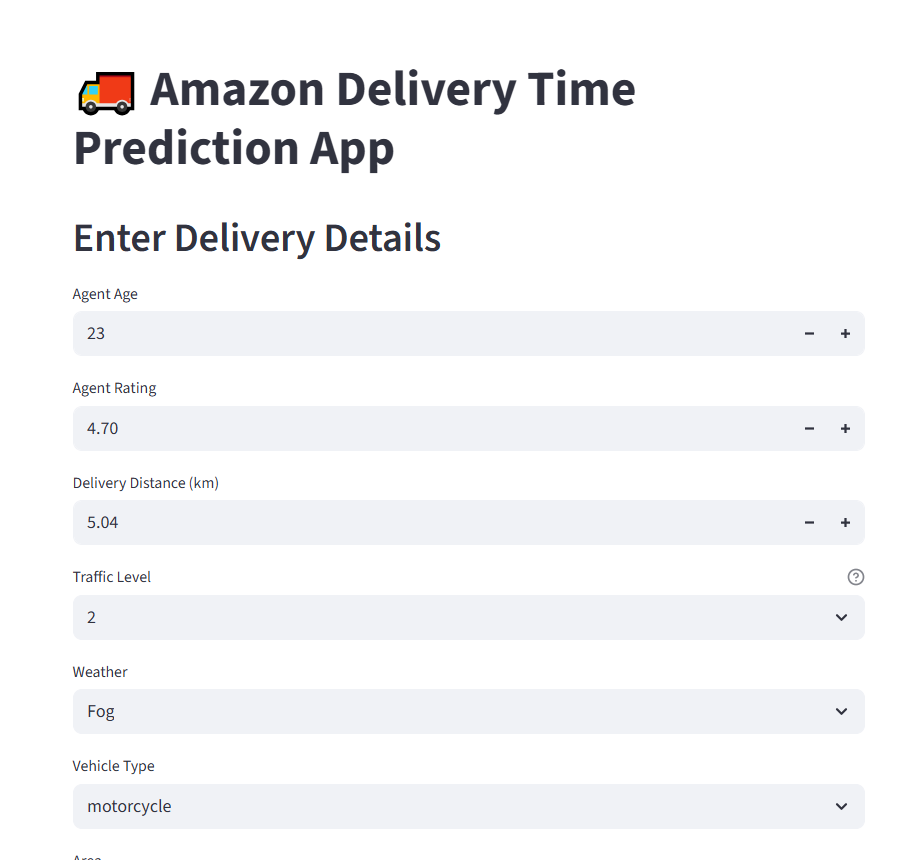

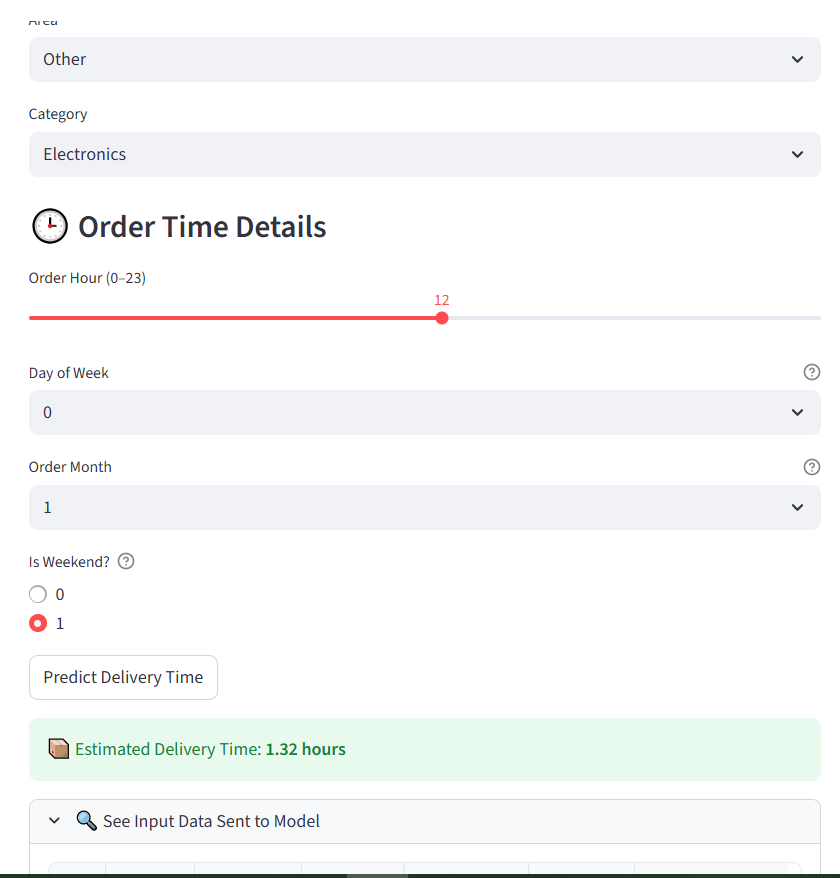

####Model Comparison and Tracking: Use MLflow to log, compare, and manage different regression models. Document the hyperparameters, performance metrics, and model versions.

In [ ]:
!pip install mlflow

In [ ]:
!mlflow ui

In [ ]:
#Tracking Multiple Regression Models
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Example dataset
# Replace this with your delivery dataset
# The dataframe 'amazon_df_clean' and 'X_numeric', 'y' are already available from previous steps.
# We will use X_numeric and y directly instead of reloading from the CSV.
# df = pd.read_csv("model_input_sample.csv")
# X = df.drop("Delivery_Time", axis=1)
# y = df["Delivery_Time"]

# Use the preprocessed data
X = X_numeric
y = y

# Impute missing values in the numeric features of X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns) # Convert back to DataFrame to keep column names


X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Define models with hyperparameters
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
}

# Start MLflow experiment
mlflow.set_experiment("Delivery_Time_Prediction")

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Train the model
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Evaluate
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        # Log parameters and metrics
        mlflow.log_param("model_type", name)
        for param, val in model.get_params().items():
            mlflow.log_param(param, val)

        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)

        # Log model artifact
        mlflow.sklearn.log_model(model, name.replace(" ", "_"))

        print(f"{name} logged successfully with MAE={mae:.3f}, RMSE={rmse:.3f}, R²={r2:.3f}")

In [ ]:
import mlflow
import mlflow.sklearn

# Assuming best_model is your best performing pipeline (from RandomizedSearchCV)
# and X_test, y_test are your test sets

# Evaluate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use the best_model (the fitted pipeline) for prediction
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Log in MLflow
mlflow.set_experiment("Amazon_Delivery_Regression")

# Extract parameters from the best model within the pipeline
best_rf_params = best_model.named_steps['model'].get_params()

with mlflow.start_run(run_name="RandomForest_Tuned"):
    mlflow.log_param("Model", "RandomForestRegressor_Tuned")
    mlflow.log_param("n_estimators", best_rf_params.get("n_estimators"))
    mlflow.log_param("max_depth", best_rf_params.get("max_depth"))
    mlflow.log_param("min_samples_split", best_rf_params.get("min_samples_split"))
    mlflow.log_param("min_samples_leaf", best_rf_params.get("min_samples_leaf"))
    mlflow.log_param("max_features", best_rf_params.get("max_features"))
    mlflow.log_param("bootstrap", best_rf_params.get("bootstrap"))


    # Log metrics
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)

    # Log the model
    mlflow.sklearn.log_model(best_model, "pipeline_model")

    print(f"✅ Tuned Random Forest logged successfully to MLflow!")
    print(f"MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")